In [0]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
tf.__version__

'1.14.0'

Создаем два постоянных тезора с помощью операции tf.constant(), tf.matmul() - хранит произведение двух тензоров

In [0]:
t1 = tf.constant([[2,2]])
t2 = tf.constant([[3],[3]])

In [0]:
dot_operator = tf.matmul(t1,t2)

Результат не получится вывести на экран, пока не создана tf.Session() и не запущена операция в рамках сессии

In [0]:
print(dot_operator)

Tensor("MatMul:0", shape=(1, 1), dtype=int32)


##  1. Cессия
Объект Session инкапсулирует среду, в которой выполняются расчеты над объектами и переменными, выполняется граф вычислений

In [0]:
s = tf.Session()
res = s.run(dot_operator)
print(res)
s.close()

[[12]]


In [0]:
with tf.Session() as s:
  res_ = s.run(dot_operator)
  print(res_)

[[12]]


## 2. Переменные (Variables)
Переменная  - это способ представления постоянного состояния, которым манипулирует ваша программа. Переменная tf.Variable существует вне session.run. Это происходит даже для переменных, определенных в сессии sess. 
Команда Sess.run (tf.global_variables_initializer ()) инициализирует все глобальные переменные.

In [0]:
a = tf.Variable(5)

add_operation = tf.add(a, 3)
update_operation = tf.assign(a, add_operation)

In [0]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    for _ in range(3):
        s.run(update_operation)
        print(s.run(a))

8
11
14


## 3. Заполнитель (Placeholder)
Placeholder (заполнитель) - это переменная, которой мы назначим данные, но позже. Это позволяет нам создавать операции и строить наш расчетный граф без необходимости данных. В TensorFlow мы подаем данные в граф через эти переменные.

In [0]:
a1 = tf.placeholder(dtype=np.float32, shape=None)
b1 = tf.placeholder(dtype=np.float32, shape=None)
c1 = a1+b1

a2 = tf.placeholder(dtype=np.float32, shape=[2,1])
b2 = tf.placeholder(dtype=np.float32, shape=[1,2])
c2 = tf.matmul(a2,b2)

In [0]:
with tf.Session() as s:
  c1_ = s.run(c1, feed_dict={a1: 5, b1: 7})
  print(c1_)
  # running two operations at once
  c1_value, c2_value = s.run([c1, c2], feed_dict={a1:5, b1:7, a2:[[2],[3]], b2:[[3,3]]})
  print(c1_value)
  print(c2_value)

12.0
12.0
[[6. 6.]
 [9. 9.]]


## 4. Функция активации
Функция активации - это нелинейность, которая применяется к набору данных

Далее показны четыре наиболее распространенные в deep learning функции активации:

In [0]:
x = np.linspace(-5,5,200)

y_relu = tf.nn.relu(x)
y_sigmoid = tf.nn.sigmoid(x)
y_tanh = tf.nn.tanh(x)
y_softplus = tf.nn.softplus(x)

In [0]:
s = tf.Session()
y_relu, y_sigmoid, y_tanh, y_softplus = s.run([y_relu, y_sigmoid, y_tanh, y_softplus])

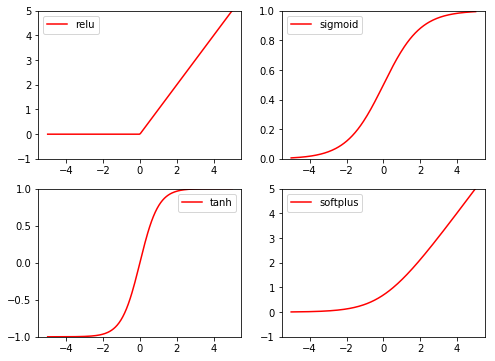

In [0]:
plt.figure(1, figsize=(8,6))
plt.subplot(221)
plt.plot(x, y_relu, c="red", label="relu")
plt.ylim([-1,5])
plt.legend(loc="best")

plt.figure(1, figsize=(8,6))
plt.subplot(222)
plt.plot(x, y_sigmoid, c="red", label="sigmoid")
plt.ylim([0,1])
plt.legend(loc="best")

plt.figure(1, figsize=(8,6))
plt.subplot(223)
plt.plot(x, y_tanh, c="red", label="tanh")
plt.ylim([-1,1])
plt.legend(loc="best")

plt.figure(1, figsize=(8,6))
plt.subplot(224)
plt.plot(x, y_softplus, c="red", label="softplus")
plt.ylim([-1,5])
plt.legend(loc="best")

## 5. Перцептрон

In [0]:
tf.set_random_seed(1) # фиксируем состояние генератора случаных чисел
np.random.seed(1) # фиксируем состояние генератора случайных чисел

x = np.linspace(-1,1,100)[:, np.newaxis]
noise = np.random.normal(0,0.1,size=x.shape)
y = np.power(x,2) + noise
#y = np.power(x,2) + np.sin(5*x) + noise

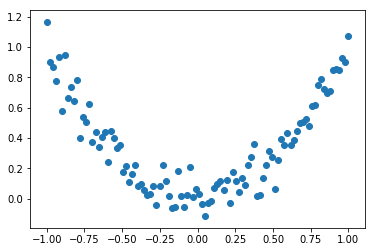

In [0]:
plt.scatter(x,y)
plt.show()

In [0]:
xt = tf.placeholder(dtype=np.float32, shape=x.shape)
yt = tf.placeholder(dtype=np.float32, shape=y.shape)

l1 = tf.layers.dense(xt, 10, tf.nn.relu) 
output = tf.layers.dense(l1,1)

loss = tf.losses.mean_squared_error(yt,output)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
trainpr = optimizer.minimize(loss)

In [0]:
?tf.placeholder()

In [0]:
?tf.layers.dense()

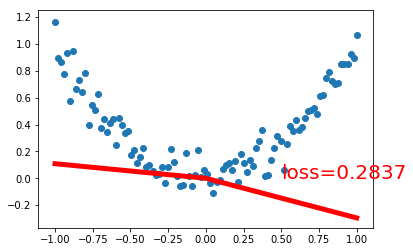

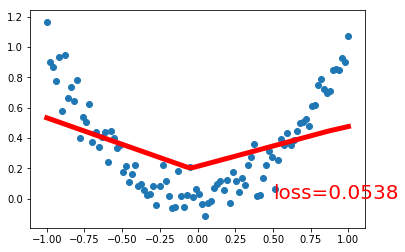

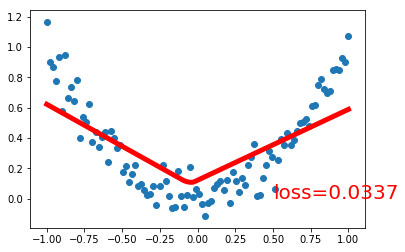

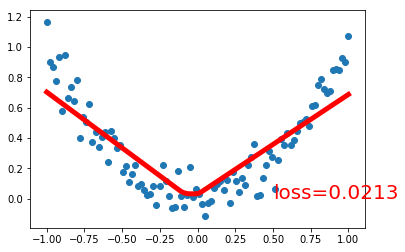

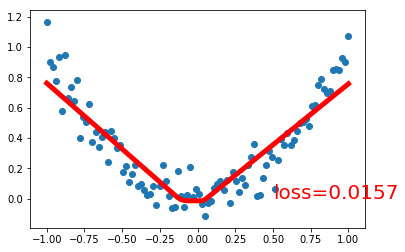

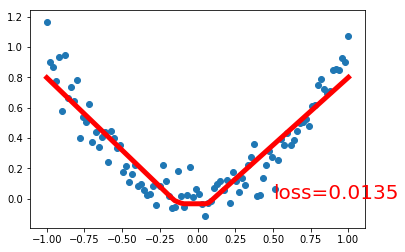

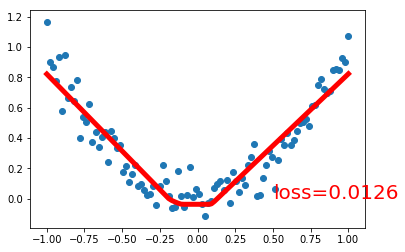

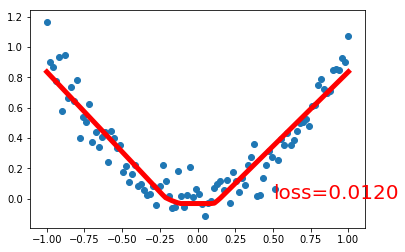

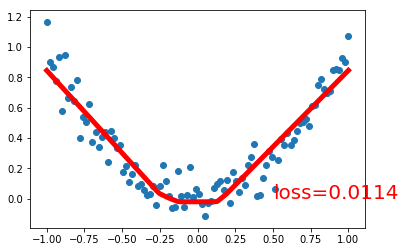

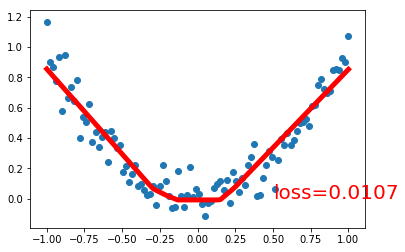

In [0]:
s = tf.Session()
s.run(tf.global_variables_initializer())

plt.ion()

for step in range(100):
  _, l, pred = s.run([trainpr, loss, output], feed_dict={xt: x, yt: y})
  if step%10==0:
    plt.cla()
    plt.scatter(x,y)
    plt.plot(x, pred, '-r', lw=5)
    plt.text(0.5, 0, 'loss=%.4f' % l, fontdict={'size': 20, "color": "red"})
    plt.pause(0.1)
    
plt.ioff()
plt.show()

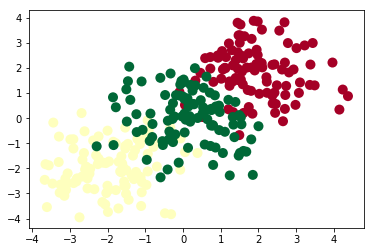

In [0]:
n_data = np.ones((100,2))

x0 = np.random.normal(2*n_data,1)      
y0 = np.zeros(100)                    
x1 = np.random.normal(-2*n_data, 1)
x2 = np.random.normal(-3*n_data+3, 1)
y1 = np.ones(100) 
y2 = np.ones(100)*2
x = np.vstack((x0, x1, x2))   
y = np.hstack((y0, y1, y2)) 

plt.scatter(x[:, 0], x[:, 1], c=y, s=100, lw=0, cmap='RdYlGn')
plt.show()


In [0]:
xt = tf.placeholder(dtype=np.float32, shape=x.shape)
yt = tf.placeholder(dtype=np.int32, shape=y.shape) # int for class labels

l1 = tf.layers.dense(xt, 10, tf.nn.relu)
output = tf.layers.dense(l1,3) # 3 for number of classes

loss = tf.losses.sparse_softmax_cross_entropy(labels=yt, logits=output)
accuracy = tf.metrics.accuracy(labels=tf.squeeze(yt), predictions=tf.argmax(output, axis=1),)[1]
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_op = optimizer.minimize(loss)

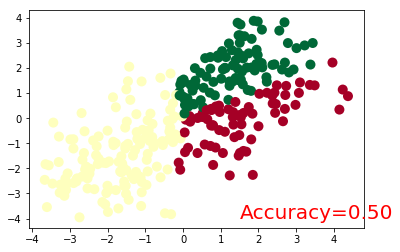

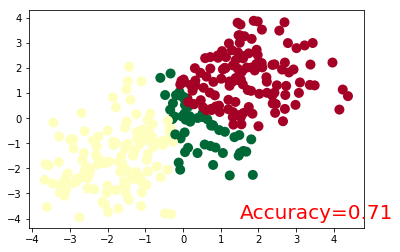

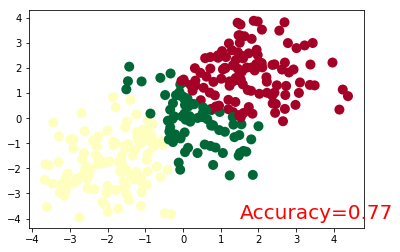

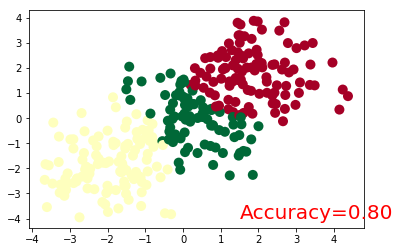

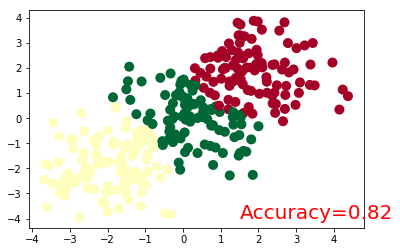

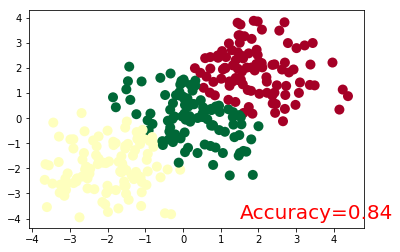

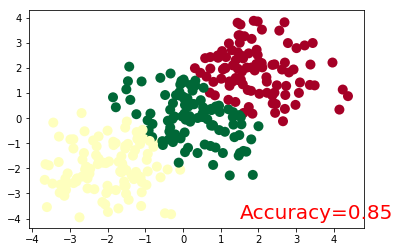

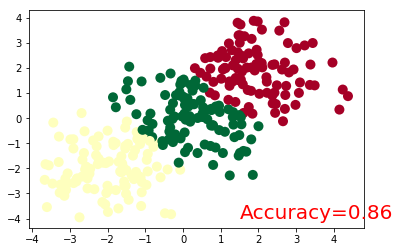

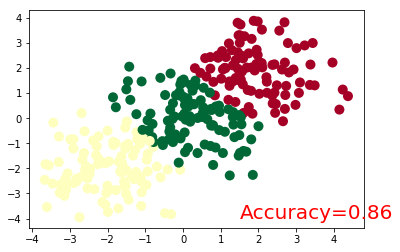

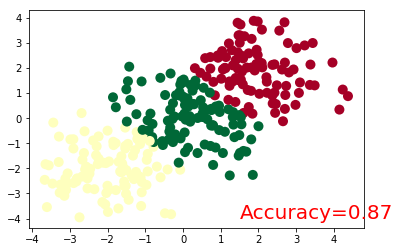

In [0]:
sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)

plt.ion()
for step in range(500):
    _, acc, pred = sess.run([train_op, accuracy, output], {xt: x, yt: y})
    if step%50 == 0:
        plt.cla()
        plt.scatter(x[:, 0], x[:, 1], c=pred.argmax(1), s=100, lw=0, cmap='RdYlGn')
        plt.text(1.5, -4, 'Accuracy=%.2f' % acc, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()

## Optimizer

In [0]:
lr = 0.01
batch_size = 32

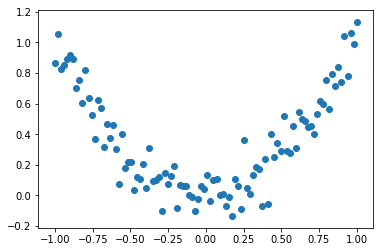

In [0]:
x = np.linspace(-1, 1, 100)[:, np.newaxis]         
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                        

plt.scatter(x, y)
plt.show()

In [0]:
class Net: # определяем класс полносвязной нейронной стеи
    def __init__(self, opt, **kwargs): # __ini__ - это конструктор класса в объекто-ориентированной парадигме, вызывается когда создается объект класса
        self.x = tf.placeholder(tf.float32, [None,1]) # self - это экземпляр класса, который дает доступ к атрибутам и методом класса
        self.y = tf.placeholder(tf.float32, [None,1])
        l = tf.layers.dense(self.x, 20, tf.nn.relu)
        out = tf.layers.dense(l,1)
        self.loss = tf.losses.mean_squared_error(self.y, out)
        self.train = opt(lr, **kwargs).minimize(self.loss)
        

net_SGD = Net(tf.train.GradientDescentOptimizer)
net_Momentum = Net(tf.train.MomentumOptimizer, momentum=0.9)
net_RMSprop = Net(tf.train.RMSPropOptimizer)
net_Adam = Net(tf.train.AdamOptimizer)

nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

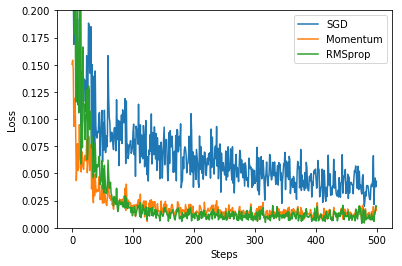

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

losses_his = [[],[],[]]

#training
for step in range(500):
    index = np.random.randint(0, x.shape[0], batch_size)
    b_x = x[index]
    b_y = y[index]
    
    for net, l_his in zip(nets, losses_his):
        _, l = sess.run([net.train, net.loss], {net.x: b_x, net.y: b_y})
        l_his.append(l)    #loss recoder
        
#plot loss history
labels = ['SGD', 'Momentum','RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label = labels[i])
plt.legend(loc = 'best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0,0.2))
plt.show()


### Задание. Сделать классификатор в Tensorflow на основе данных Make Circles (смотреть предыдущие задания), основываясь на примерах выше. 